In [23]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import mplcyberpunk
import warnings
warnings.filterwarnings('ignore')
plt.style.use("cyberpunk")

Loading raw data (json format) for the last 10 years (26.09.2015-26.09.2025)

In [24]:
with open('kp_gfz_de.json', 'r') as file:
    data = json.load(file)
data

{'meta': {'source': 'GFZ Potsdam', 'license': 'CC BY 4.0'},
 'datetime': ['2015-09-26T00:00:00Z',
  '2015-09-26T03:00:00Z',
  '2015-09-26T06:00:00Z',
  '2015-09-26T09:00:00Z',
  '2015-09-26T12:00:00Z',
  '2015-09-26T15:00:00Z',
  '2015-09-26T18:00:00Z',
  '2015-09-26T21:00:00Z',
  '2015-09-27T00:00:00Z',
  '2015-09-27T03:00:00Z',
  '2015-09-27T06:00:00Z',
  '2015-09-27T09:00:00Z',
  '2015-09-27T12:00:00Z',
  '2015-09-27T15:00:00Z',
  '2015-09-27T18:00:00Z',
  '2015-09-27T21:00:00Z',
  '2015-09-28T00:00:00Z',
  '2015-09-28T03:00:00Z',
  '2015-09-28T06:00:00Z',
  '2015-09-28T09:00:00Z',
  '2015-09-28T12:00:00Z',
  '2015-09-28T15:00:00Z',
  '2015-09-28T18:00:00Z',
  '2015-09-28T21:00:00Z',
  '2015-09-29T00:00:00Z',
  '2015-09-29T03:00:00Z',
  '2015-09-29T06:00:00Z',
  '2015-09-29T09:00:00Z',
  '2015-09-29T12:00:00Z',
  '2015-09-29T15:00:00Z',
  '2015-09-29T18:00:00Z',
  '2015-09-29T21:00:00Z',
  '2015-09-30T00:00:00Z',
  '2015-09-30T03:00:00Z',
  '2015-09-30T06:00:00Z',
  '2015-09-30T09:0

Reshaping it into pandas dataframe 

In [4]:
col_date = pd.DataFrame(data['datetime'])
col_kp = pd.DataFrame(data['Kp'])
col_status = pd.DataFrame(data['status'])
df = pd.concat([col_date, col_kp, col_status], 
                axis=1)
df.columns = ['Datetime', 'Kp index', 'Status']
df

,Datetime,Kp index,Status
0,2015-09-26T00:00:00Z,1.333,def
1,2015-09-26T03:00:00Z,0.667,def
2,2015-09-26T06:00:00Z,0.333,def
3,2015-09-26T09:00:00Z,0.333,def
4,2015-09-26T12:00:00Z,0.333,def
...,...,...,...
29227,2025-09-26T09:00:00Z,2.000,pre
29228,2025-09-26T12:00:00Z,1.000,pre
29229,2025-09-26T15:00:00Z,0.333,pre
29230,2025-09-26T18:00:00Z,2.000,pre


Checking for null values and basic information about data

In [5]:
print('Null values count:')
print(df.isnull().sum())
print('-'*10)
df.info()
print('-'*10)
df.describe()

Null values count:
Datetime    0
Kp index    0
Status      0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29232 entries, 0 to 29231
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  29232 non-null  object 
 1   Kp index  29232 non-null  float64
 2   Status    29232 non-null  object 
dtypes: float64(1), object(2)
memory usage: 685.3+ KB
----------


,Kp index
count,29232.000000
mean,1.745738
std,1.283674
min,0.000000
25%,0.667000
50%,1.667000
75%,2.667000
max,9.000000


Time intervals in data (taking first 20 rows as an example):

In [32]:
rows = df['Datetime'].head(20).tolist()
pattern = "\d{2}:\d{2}:\d{2}"
results = []
for row in rows:
    match = re.search(pattern, row)
    results.append(match.group())
results

['00:00:00',
 '03:00:00',
 '06:00:00',
 '09:00:00',
 '12:00:00',
 '15:00:00',
 '18:00:00',
 '21:00:00',
 '00:00:00',
 '03:00:00',
 '06:00:00',
 '09:00:00',
 '12:00:00',
 '15:00:00',
 '18:00:00',
 '21:00:00',
 '00:00:00',
 '03:00:00',
 '06:00:00',
 '09:00:00']

Data start at 00:00:00 each day and continue until 21:00:00 (9 PM), with a 3-hour interval between measurements (12 AM -> 3 AM -> 6 AM -> 9 AM -> 12 PM -> 3 PM -> 6 PM -> 9 PM). So, data were measured 8 times per day

Most common KP index values descending

In [7]:
df["Kp index"].value_counts()

Kp index
0.667    3399
0.333    3181
1.000    3111
1.333    2957
1.667    2689
2.000    2523
2.333    2101
2.667    1816
0.000    1806
3.000    1551
3.333    1139
3.667     883
4.000     688
4.333     444
4.667     341
5.000     201
5.333     134
5.667      95
6.333      45
6.000      44
6.667      27
7.000      15
7.667      13
7.333      10
8.333       8
8.000       5
8.667       4
9.000       2
Name: count, dtype: int64

In [8]:
print(f'Min KP index: {df['Kp index'].min()}')
print(f'Max KP index: {df['Kp index'].max()}')
print(f'Average KP index: {df['Kp index'].mean()}')

Min KP index: 0.0
Max KP index: 9.0
Average KP index: 1.7457380952380952


KP index visualisation

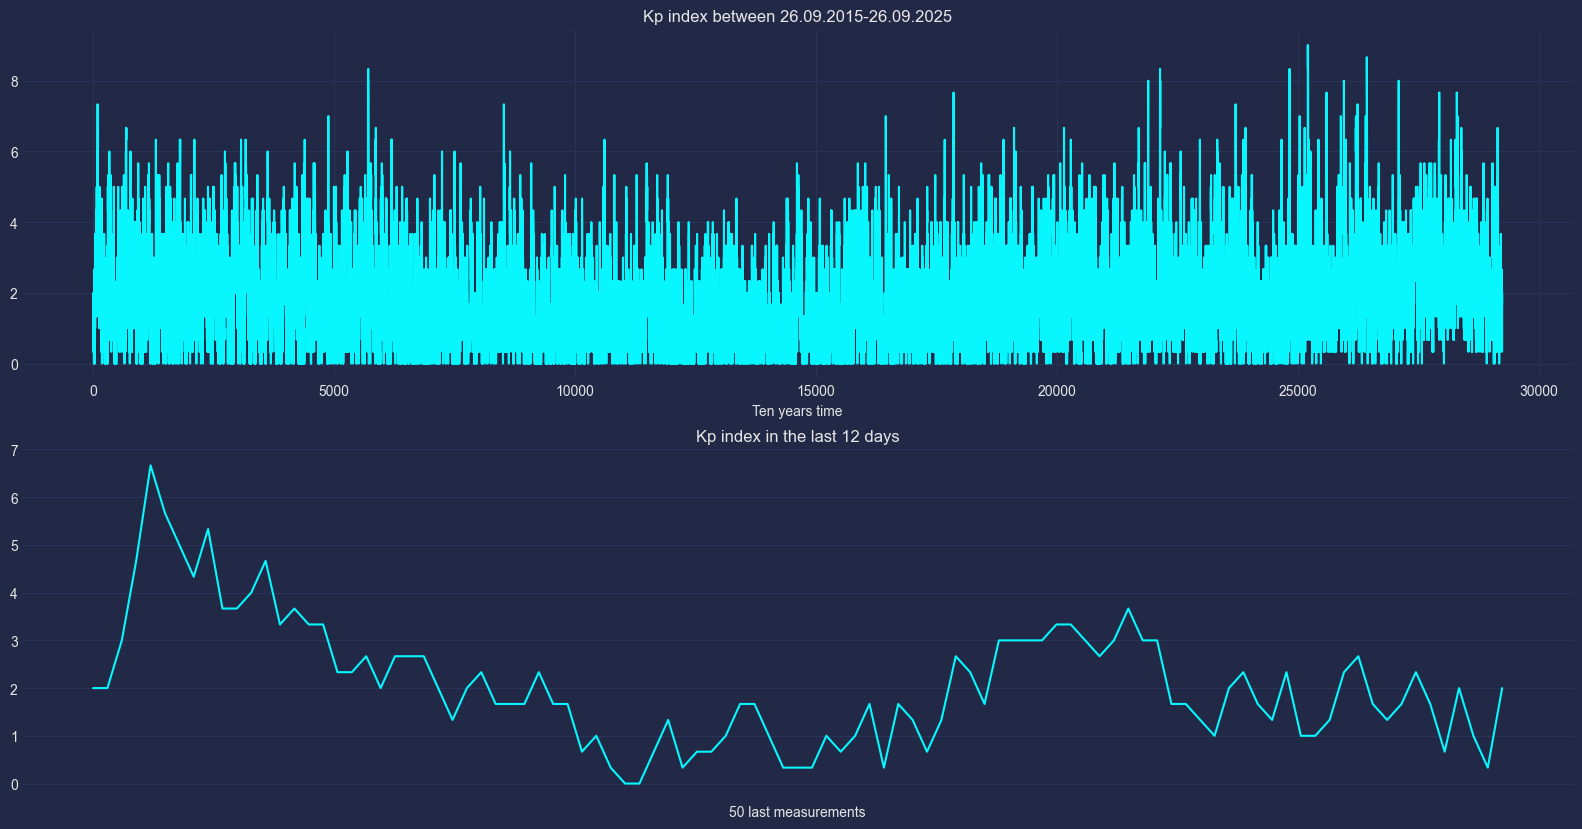

In [52]:
fig, axes = plt.subplots(2, 1, figsize=(20,10))

axes[0].plot(df['Kp index'])
axes[0].set_title('Kp index between 26.09.2015-26.09.2025')
axes[0].set_xlabel('Ten years time')

axes[1].plot(df['Kp index'].iloc[-100:-1])
axes[1].set_title('Kp index in the last 12 days')
axes[1].set_xlabel('50 last measurements')

plt.xticks([])
plt.show()

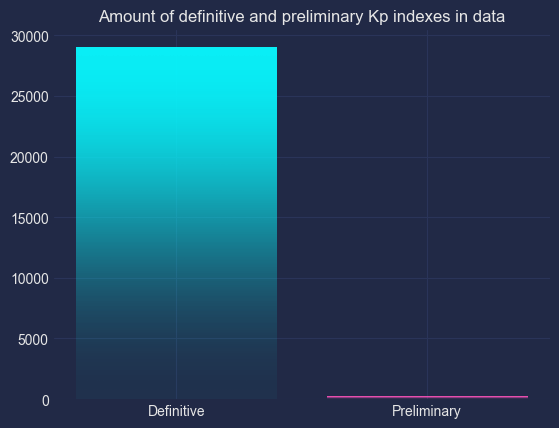

In [78]:
categories = ['Definitive', 'Preliminary']
values = [sum(df.Status == 'def'), sum(df.Status == 'pre')]
bars = plt.bar(categories, values, color=['C0', 'C1'])
plt.title('Amount of definitive and preliminary Kp indexes in data')

mplcyberpunk.add_bar_gradient(bars=bars)
plt.show()

Dropping rows where status is preliminary (better not to train the model on such data) and saving reshaped data into csv for training the model

In [ ]:
# dropping preliminary rows (gonna predict them later)
df = df.drop(df[df.Status == 'pre'].index)
df = df.drop('Status', axis=1)
df.to_csv('Reshaped_data.csv', index=False)